<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Supervised Learning: Classification</center></font></h1>
<h1><center>Personal Loan Campaign Project</center></h1>
<h3><center>Charlcye Mitchell, November 2022</center></h3>

#Problem Definition

##Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to **identify the potential customers who have a higher probability of purchasing the loan.**

##Objective
- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

##Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: # years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other bank (excluding All Life Bank)?

#Exploratory Data Analysis

###Importing the necessary packages

In [1]:
#Beautify code
!pip install nb-black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    make_scorer,

)

###Reading the Datasets

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read in the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_Modelling.csv')

## Basic Data Review

In [5]:
# looking at head (5 observations) 
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# count the rows and columns
df.shape

(5000, 14)

In [7]:
# check the null counts and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no null values and all features have already been encoded in a numerical format. 🆒

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
# What's up with the -3 experience?  (Should reflect # years of professional experience)
df['Experience'].value_counts().sort_index()

-3       4
-2      15
-1      33
 0      66
 1      74
 2      85
 3     129
 4     113
 5     146
 6     119
 7     121
 8     119
 9     147
 10    118
 11    116
 12    102
 13    117
 14    127
 15    119
 16    127
 17    125
 18    137
 19    135
 20    148
 21    113
 22    124
 23    144
 24    131
 25    142
 26    134
 27    125
 28    138
 29    124
 30    126
 31    104
 32    154
 33    117
 34    125
 35    143
 36    114
 37    116
 38     88
 39     85
 40     57
 41     43
 42      8
 43      3
Name: Experience, dtype: int64

In [10]:
# How many people take the loan?
df['Personal_Loan'].value_counts().sort_index()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [11]:
# What are the zip code values?
df['ZIPCode'].value_counts().sort_values

<bound method Series.sort_values of 94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64>

##Univariate Analysis

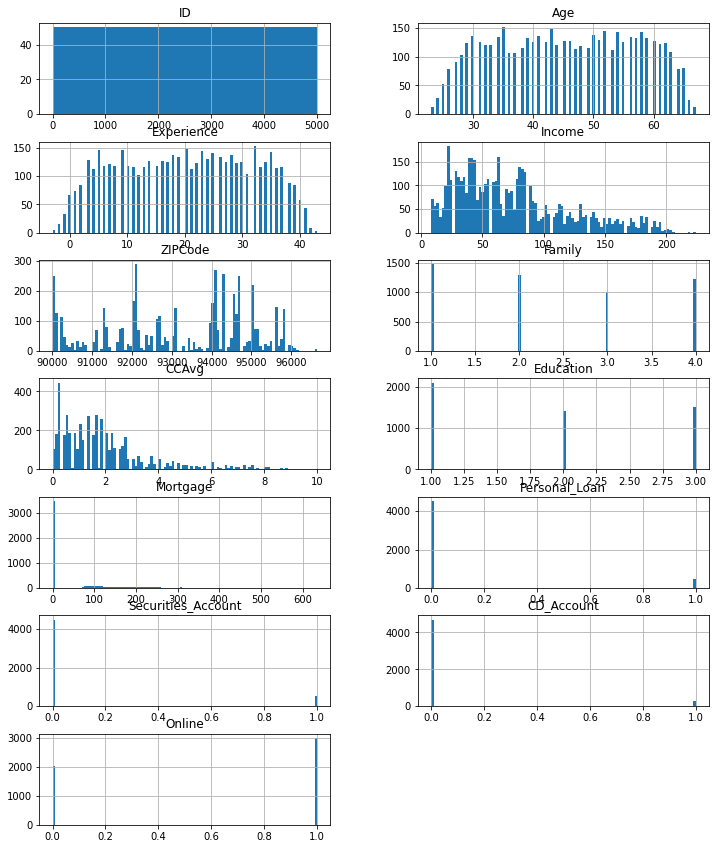

In [12]:
columns = list(df)[0:-1]
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

##Bivariate Analysis

Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

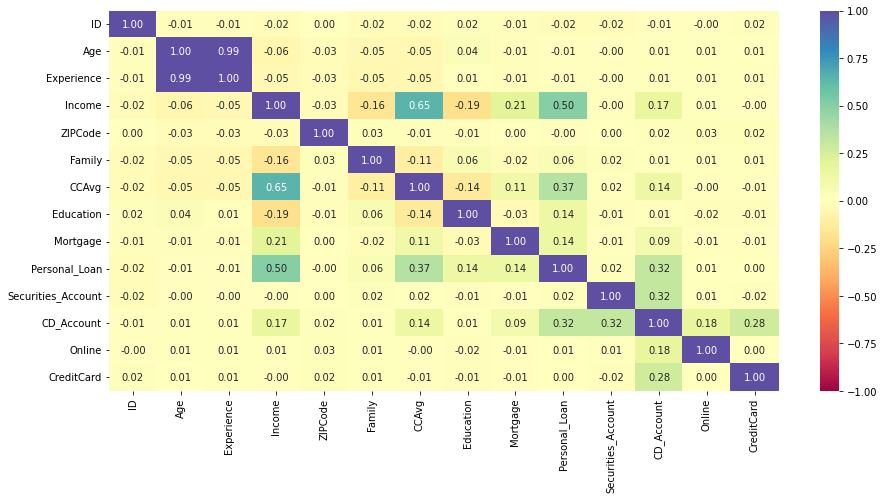

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [14]:
df.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


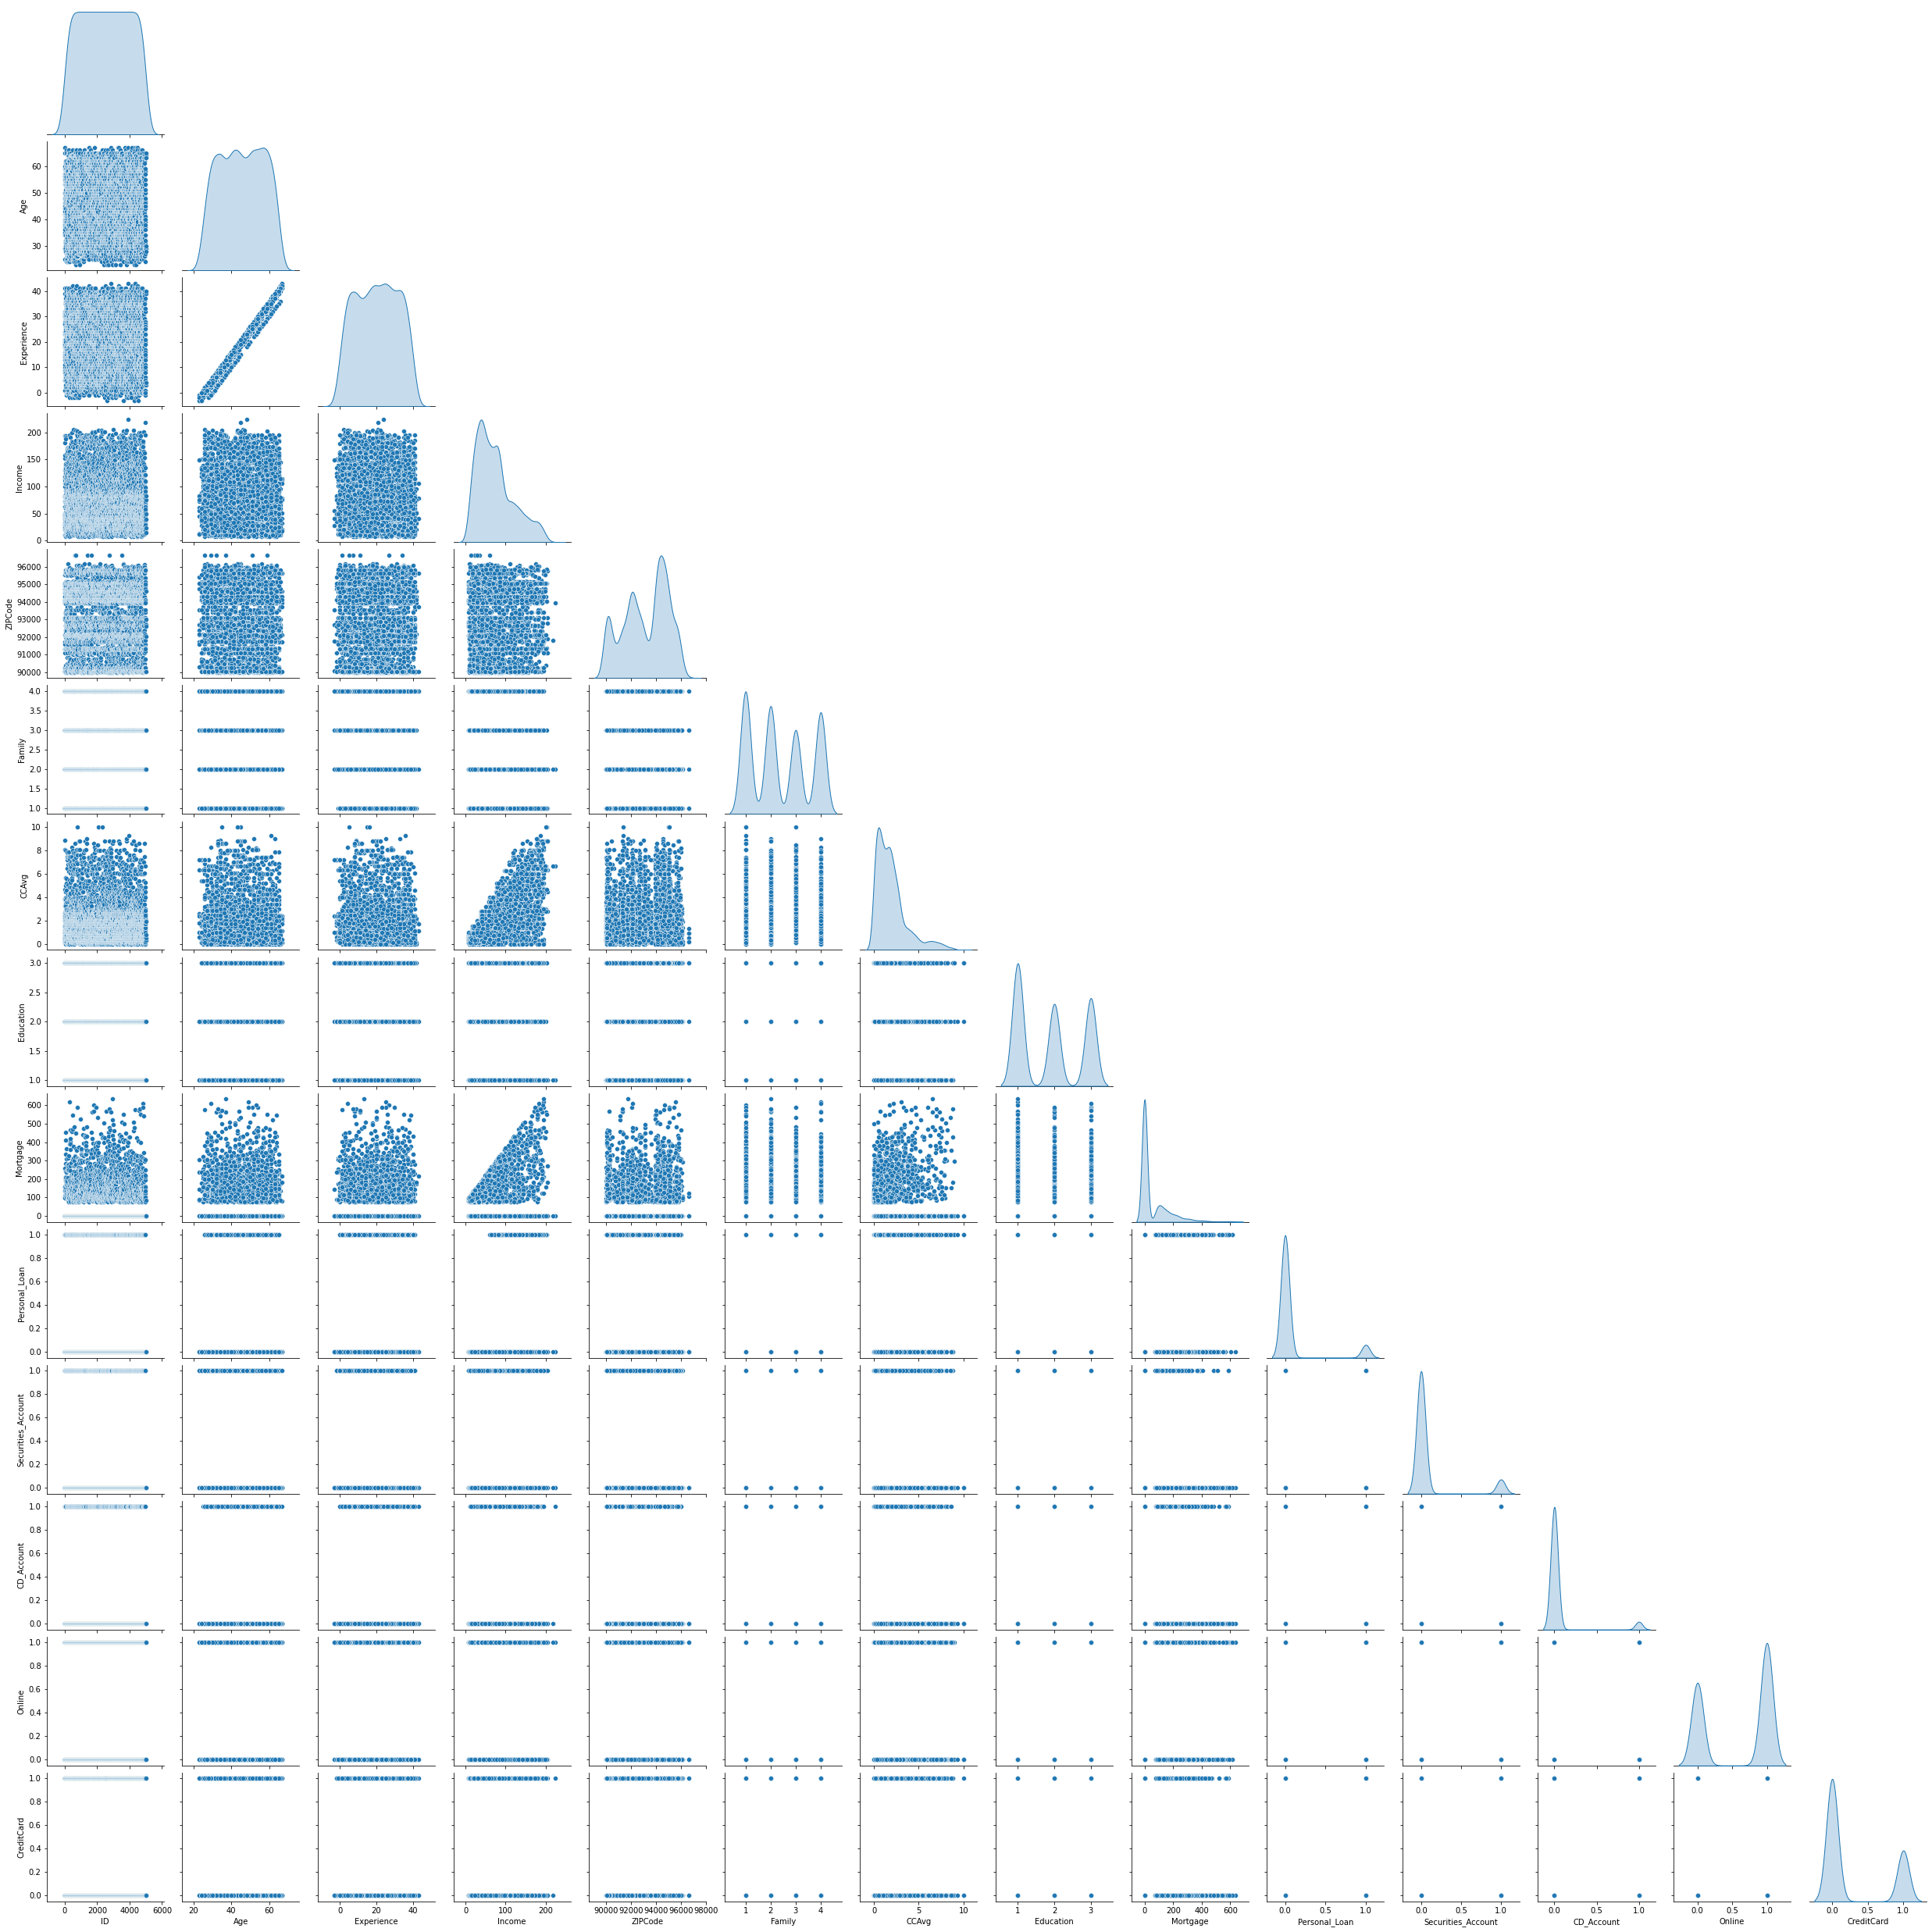

In [15]:
sns.pairplot(df, diag_kind="kde", corner=True)
plt.show()

Experience and age have a very strong positive correlation (.99!).  We will use this to fill in the negative values for experience.

There is also positive correlation between Income and CCAvg; Income and Mortgage.

##Key Insights from EDA
Most customers who accepted a personal loan in the previous campaigns are:

*  Age 35-55
*  9+ years experience
*  Income 120K+ dollars
*  From LA, San Diego, & Santa Clara zip codes
*  3+ family size
*  Have CD Account
*  Have graduate degree+
*  Spend ~$2.5K/mo on credit cards
*  Have a mortgage
*  Use online banking 


#Data Pre-Processing

In [16]:
# Clean up rows with negative years experience
df[df < 0] = 0
#dfExp = df.loc[df['Experience'] >0]
#negExp = df.Experience < 0
#column_name = 'Experience'
#mylist = df.loc[negExp]['ID'].tolist()
#for id in mylist:
#    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
#    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
#    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
#    exp = df_filtered['Experience'].median()
#    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [17]:
# Check that all experience rows are positive values
df['Experience'].value_counts().sort_index()

0     118
1      74
2      85
3     129
4     113
5     146
6     119
7     121
8     119
9     147
10    118
11    116
12    102
13    117
14    127
15    119
16    127
17    125
18    137
19    135
20    148
21    113
22    124
23    144
24    131
25    142
26    134
27    125
28    138
29    124
30    126
31    104
32    154
33    117
34    125
35    143
36    114
37    116
38     88
39     85
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

In [18]:
#I would like to reduce the number of values for ZIPCode - currently 467
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [19]:
#pip install uszipcode

In [68]:
#import the searchengine from uszipcode library
#from uszipcode import SearchEngine

#create the search engine
#search = SearchEngine()

#create a function to get the city from the zipcode
#def get_city(x):
#    return search.by_zipcode(x).city

#create a function to get the state from the zipcode
#def get_state(x):
#    return search.by_zipcode(x).state

In [69]:
#create 2 empty lists to fill with city and state for each customer
#the_city_ = []
#the_state_=[]

#create a for loop to loop on the zipcodes, extract the city and state and fill the lists
#for i in np.arange(0,5000):
#    try:
#        city = get_city(loan["ZIPCode"].iloc[i])
#        the_city_.append(city)
#        state = get_state(loan["ZIPCode"].iloc[i])
#        the_state_.append(state)
#    except:
#        the_city_.append(np.nan)
#        the_state_.append(np.nan)
#    continue

In [71]:
#Adding the city and state lists as new columns in the dataset
#df['City'] = the_city_
#df['State'] = the_state_
#df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,State
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,NaN,NaN
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,NaN,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,NaN,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,NaN,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,NaN,NaN


In [20]:
# Python package that can help in mapping zip codes to different locations 

#from uszipcode import SearchEngine

#def zipcode_to_county(zipc):
#    search = SearchEngine()
#    zipcode = search.by_zipcode(zipc)
#    return zipcode.county

In [21]:
# Something is either wrong with the data or wrong with the function. I couldn't make this work.
# AttributeError: 'NoneType' object has no attribute 'county'
# df["County"] = df["ZIPCode"].apply(zipcode_to_county)

In [22]:
# Let's try by bucketing and then perform weight of evidence (WoE) numerical transform

#zipBins = np.arange(90000, 99999, 500)
#zipCat = pd.cut(df['ZIPCode'], bins = zipBins)
#df['ZIPCat'] = zipCat
#df.head()

In [23]:
#woe_df = df.groupby('ZIPCat')['Personal_Loan'].mean()
#woe_df = pd.DataFrame(woe_df)
#woe_df = woe_df.rename(columns = {'Personal_Loan': 'Good'})
#woe_df['Bad'] = 1 - woe_df['Good']
#woe_df['Good'] = np.where(woe_df['Good'] == 0, 0.000001, woe_df['Good'])
#woe_df['Bad'] = np.where(woe_df['Bad'] == 0, 0.000001, woe_df['Bad'])
#woe_df['WoE'] = np.log(woe_df['Good']/woe_df['Bad'])
#df.loc[:, 'ZIP_WoE'] = df['ZIPCat'].map(woe_df['WoE'])
#df

In [24]:
#df['ZipCat'] = pd.to_numeric(df['col_name'], errors='coerce')

# Model Building

##Goals for model evaluation
**False prediction types:**
*  *False Positive:* Predicting a customer will borrow the personal loan but in reality the customer does not borrow.
*  *False Negative:* Predicting a customer will not borrow the personal loan but in reality the customer will borrow the loan.

**Goal: Minimize False Negatives, Maximize Recall**
*  False negative predictions are concerning as the AllLife Bank is looking to expand it's loan business, and therefore every customer who *will* borrow the personal loan is very important. 

## Creating training and test sets

In [25]:
#Calculate ratio of Declined(0) / Accepted(1) from Personal_Loan variable 
n_declined = len(df.loc[df['Personal_Loan'] == 0])
n_accepted = len(df.loc[df['Personal_Loan'] == 1])
print("Customers that accepted the personal loan offered in the last campaigns: {0} ({1:2.2f}%)".format(n_declined, (n_declined / (n_declined + n_accepted)) * 100 ))
print("Customers that accepted the personal loan offered in the last campaigns: {0} ({1:2.2f}%)".format(n_accepted, (n_accepted / (n_declined + n_accepted)) * 100))

Customers that accepted the personal loan offered in the last campaigns: 4520 (90.40%)
Customers that accepted the personal loan offered in the last campaigns: 480 (9.60%)


In [26]:
#Splitting the Data
from sklearn.model_selection import train_test_split

X = df.drop('Personal_Loan',axis=1)     # Predictor feature columns (8 X m)
Y = df['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [27]:
#Check the split of the data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [28]:
#Check normal/abnormal ratio in split data 
print("Declined Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 1]), (len(df.loc[df['Personal_Loan'] == 1])/len(df.index)) * 100))
print("Accepted Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Personal_Loan'] == 0]), (len(df.loc[df['Personal_Loan'] == 0])/len(df.index)) * 100))
print("")
print("Training Declined Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Accepted Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Declined Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Accepted Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Declined Values    : 480 (9.60%)
Accepted Values   : 4520 (90.40%)

Training Declined Values    : 331 (9.46%)
Training Accepted Values   : 3169 (90.54%)

Test Declined Values        : 149 (9.93%)
Test Accepted Values       : 1351 (90.07%)



##Logistic Regression

In [29]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000036  0.000449 -0.001166  0.036137 -0.000065  0.008636  0.005755   

          7         8         9        10        11        12  intercept  
0  0.009354  0.000857  0.000301  0.002674 -0.000067 -0.000006  -0.000035  


In [33]:
model_score = model.score(X_train, y_train)
print(model_score)

0.9091428571428571


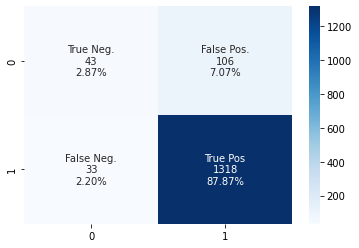

In [51]:
# Create the most beautiful confusion matrix ever witnessed

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

group_names = ["True Neg.", "False Pos.", "False Neg.", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

The confusion matrix

True Positives (TP): we correctly predicted loan declined 1318 (87.87%)

True Negatives (TN): we correctly predicted loan accepted 43 (2.87%)

False Positives (FP): we incorrectly predicted loan declined (a "Type I error") 106 (7.07%) Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted loan accepted (a "Type II error") 33 (2.2%) Falsely predict negative Type II error

### Model Performance: Log Regr

In [57]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [58]:
get_recall_score(model)

Recall on training set :  0.32326283987915405
Recall on test set :  0.28859060402684567


Our goal is to minimize false negatives and maximize recall.  The recall should ideally be close to 1.  This model performance is not great.

## Decision Tree

In [77]:
#function to plot a decision tree
def plot_tree(model, Predictor):
    feature_names = Predictor.columns.to_list()
    plt.figure(figsize=(20, 30))
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    # below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

In [59]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance: DTree

In [60]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9793333333333333


In [67]:
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


In [65]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

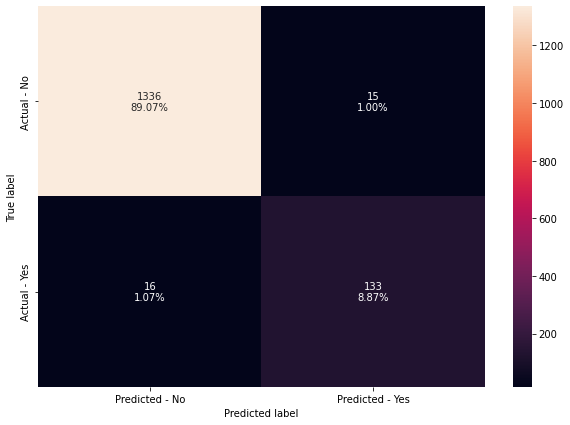

In [66]:
make_confusion_matrix(dTree,y_test)

The confusion matrix

True Positives (TP): we correctly predicted loan declined 1336 (89.07%)

True Negatives (TN): we correctly predicted loan accepted 133 (8.87%)

False Positives (FP): we incorrectly predicted loan declined (a "Type I error") 16 (1.07%) Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted loan accepted (a "Type II error") 15 (1%) Falsely predict negative Type II error

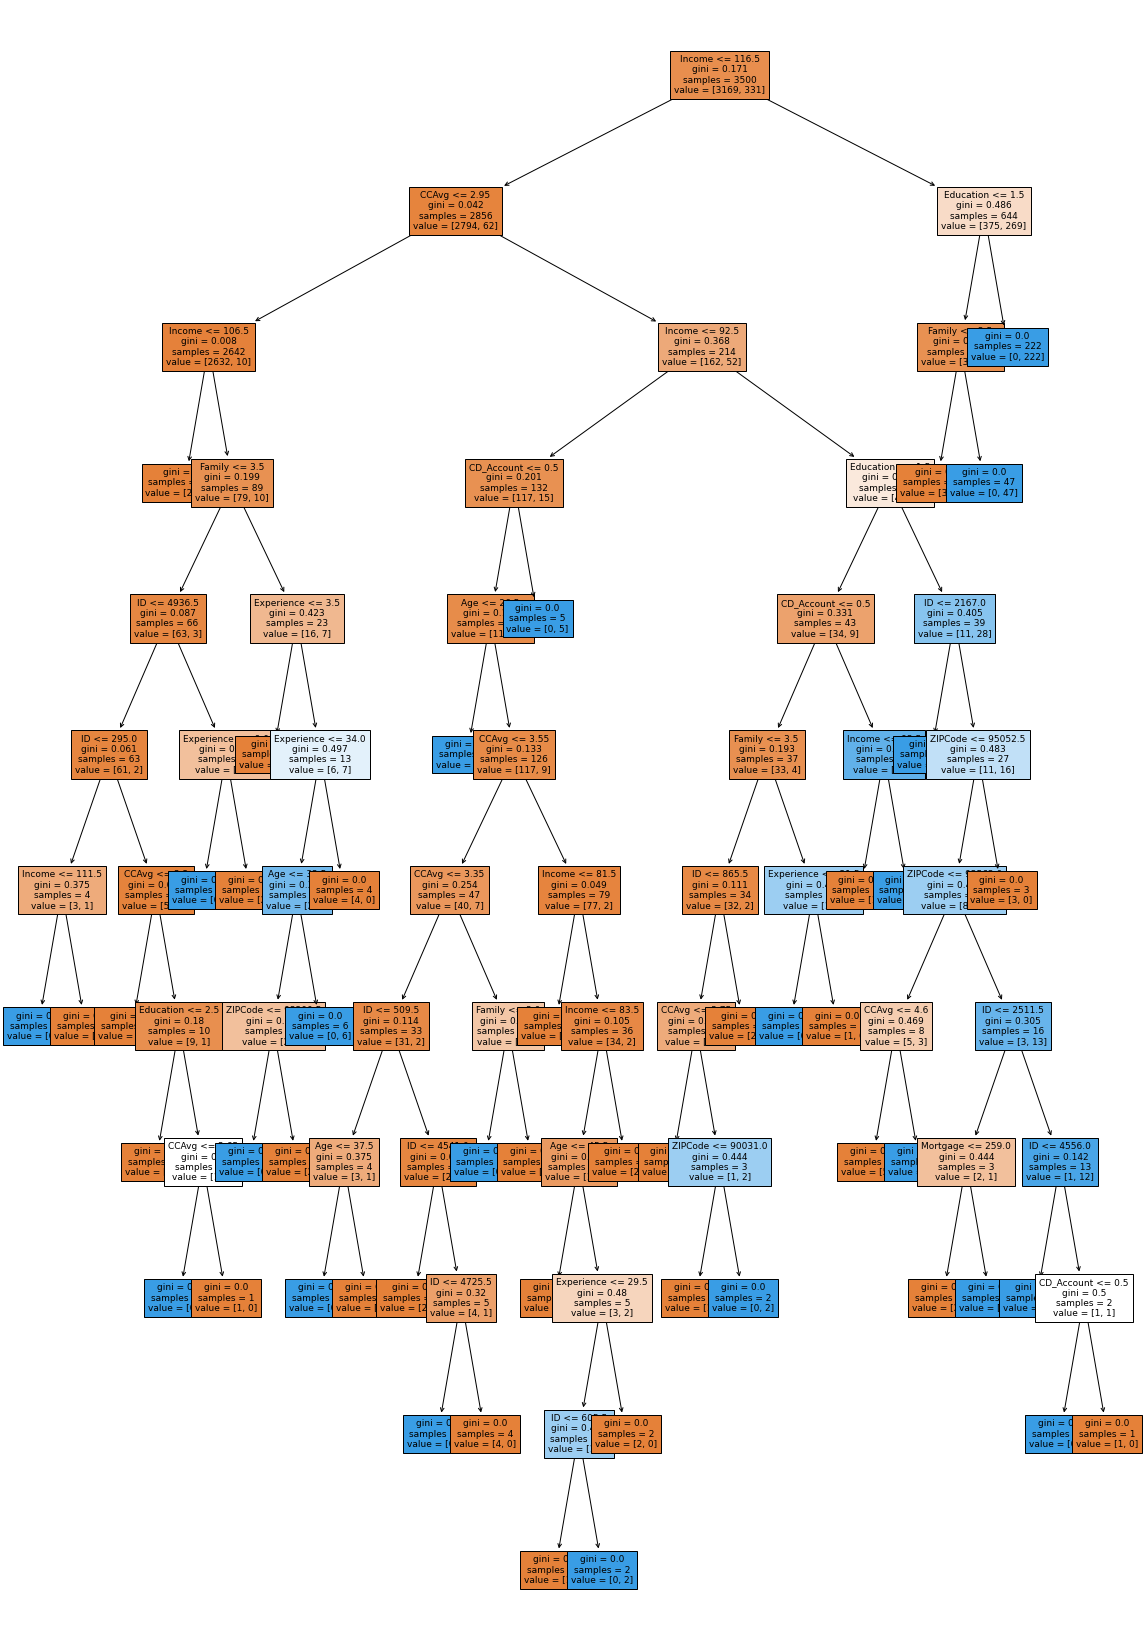

In [79]:
#plotting the tree
plot_tree(dTree,X_train)

###Tuning

In [80]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

def view_nd_plot_importance(model, predictors):
    print("The features importances:")
    print(
        pd.DataFrame(
            model.feature_importances_, columns=["Imp"], index=predictors.columns
        ).sort_values(by="Imp", ascending=False)
    )

    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 65))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
    plt.yticks(range(len(indices)), [predictors.columns[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

The features importances:
                         Imp
Education           0.402286
Income              0.304042
Family              0.157297
CCAvg               0.053165
CD_Account          0.024352
ID                  0.017656
Experience          0.017286
ZIPCode             0.011810
Age                 0.009880
Mortgage            0.002224
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


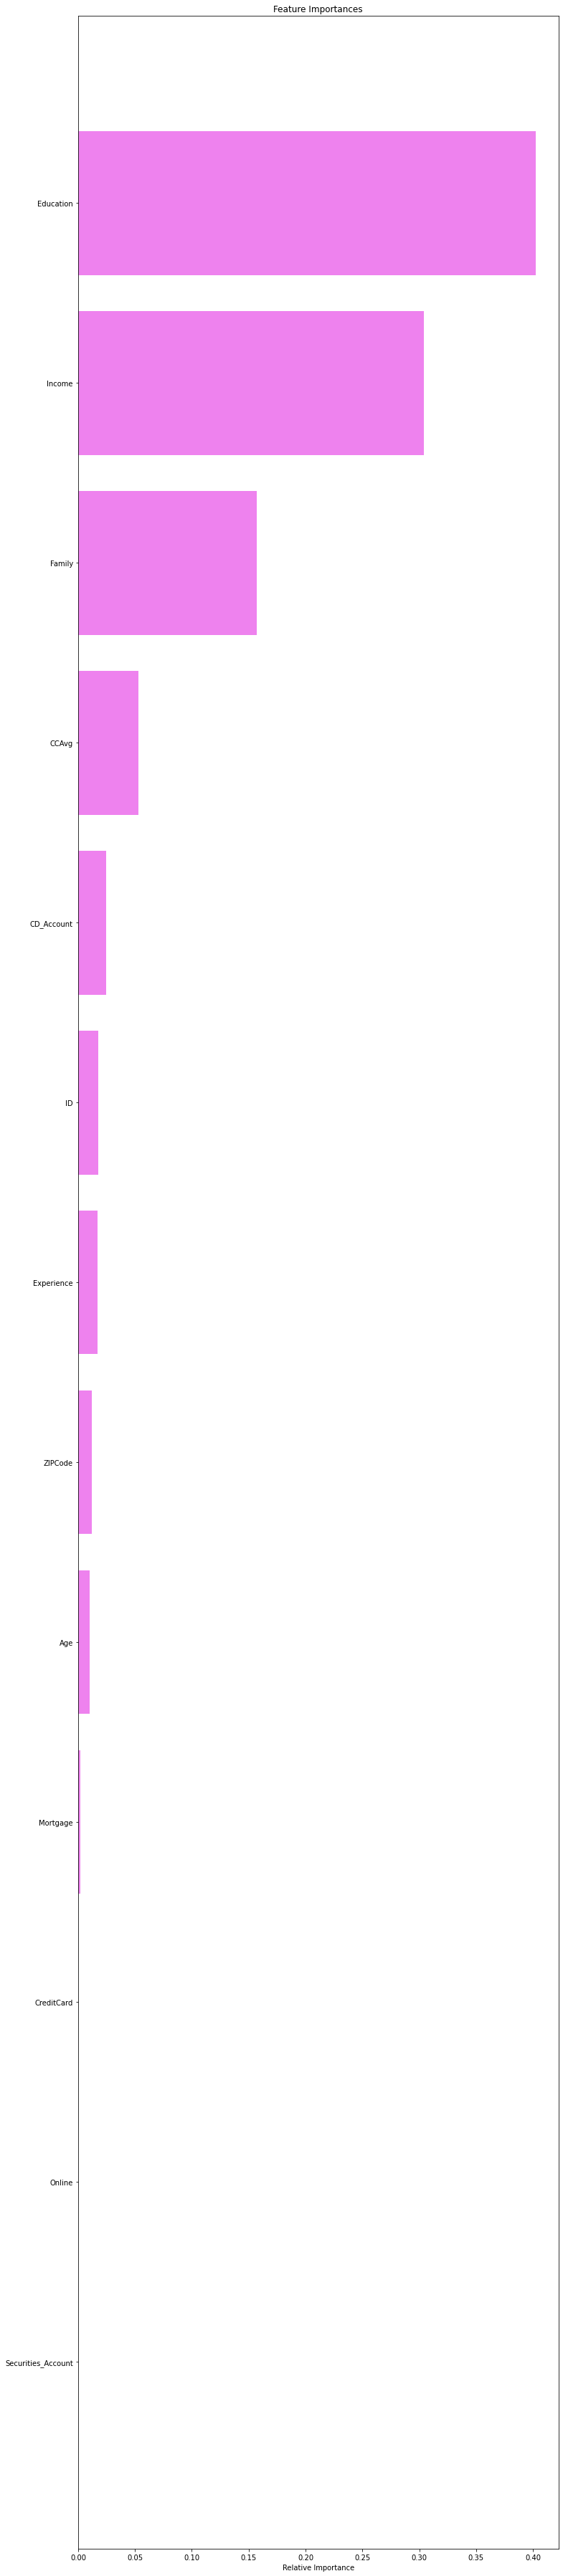

In [81]:
view_nd_plot_importance(dTree, X_train)

In [83]:
#Pre-prunning via hyperparameter tuning
#Checking max depth
print(f'''The max depth of the t_0 =  {dTree.tree_.max_depth}
The node_count ={dTree.tree_.node_count}
The number of leaves = {dTree.tree_.n_leaves}''')

The max depth of the t_0 =  11
The node_count =97
The number of leaves = 49


In [86]:
# Choose the type of classifier.
t_grid = DecisionTreeClassifier(random_state=1, class_weight={0: 0.094571, 1: 0.905429})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, 20, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
    'max_leaf_nodes' : [2, 3, 5, 10],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(t_grid, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
t_grid = grid_obj.best_estimator_

# Fit the best algorithm to the data.
t_grid.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=1e-05, random_state=1,
                       splitter='random')

Plugging in the hyper parameters:

*  max_depth = 5
*  Criterion = Entropy


In [87]:
# Choose the type of classifier.
t_1 = DecisionTreeClassifier(random_state=1,max_depth=5, criterion='entropy'
                             , class_weight={0: 0.094571, 1: 0.905429})

In [88]:
t_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.094571, 1: 0.905429},
                       criterion='entropy', max_depth=5, random_state=1)

In [91]:
#Performance Evaluation
Recall_Train_T_1 = get_recall_score(t_1)


Recall on training set :  1.0
Recall on test set :  0.9664429530201343


## Results & Recommendations
Our goal is to minimize false negatives and maximize recall.

*  There are fewer false negatives on Decision Tree (1%) than Logistic Regression (2%).

*  Recall is significantly better on the tuned Decision Tree (.96) than the origianal Decision Tree (.89) or Logistic Regression (.28).

The features that most affect the acceptance of a personal loan are listed in below table with priority levels (1 being the highest priority and 5 being the lowest priority:

|Priority|Feature|Effect on customer|
|:--:|:--|:--|
|1|Education|Customers with Education level 2 & 3 are more willing to accept a personal loan than levels 1|
|2|Income|The higher the income, the more chances the customer will accept a personal loan|
|3|Family|As family size grows, customers are more willing to accept personal loan|
|4|CCAvg|As the monthly spending of customers increase, the more they are willing to accept personal loan|
|5|CD_Account|Customers with a certificate of deposit (CD) account with the bank are more willing to accept a personal loan|

**Recommendations**
*  Review the customers profiles before approaching them for a personal loan offer.
*  Ensure they meet the criteria in the table above.